<a href="https://colab.research.google.com/github/Ansareze/domain_specific_NLP_model_for_indian_recipe_generation/blob/main/Domain_Specific_NLP_Model_for_Indian_Recipe_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load dependencies

In [1]:
!pip install rouge-score
!pip install accelerate
!pip install gradio

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=97ec82811eaf4526caf11d136d844d9f28b19d2f83dacb9141ec5115a0dbcdc8
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# load dataset

data = pd.read_csv('IndianFoodDataset-1.csv')

In [5]:
data.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    1186 non-null   int64 
 1   RecipeName              1186 non-null   object
 2   TranslatedRecipeName    1186 non-null   object
 3   Ingredients             1185 non-null   object
 4   TranslatedIngredients   1185 non-null   object
 5   PrepTimeInMins          1186 non-null   int64 
 6   CookTimeInMins          1186 non-null   int64 
 7   TotalTimeInMins         1186 non-null   int64 
 8   Servings                1186 non-null   int64 
 9   Cuisine                 1186 non-null   object
 10  Course                  1186 non-null   object
 11  Diet                    1186 non-null   object
 12  Instructions            1186 non-null   object
 13  TranslatedInstructions  1186 non-null   object
 14  URL                     1186 non-null   object
dtypes: i

In [7]:
data.shape

(1186, 15)

In [8]:
#  drop specified columns
data = data.drop(["Srno","Ingredients","Instructions"], axis = 1)

In [9]:
data.isnull().sum()

,0
RecipeName,0
TranslatedRecipeName,0
TranslatedIngredients,1
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0


<Axes: xlabel='Diet'>

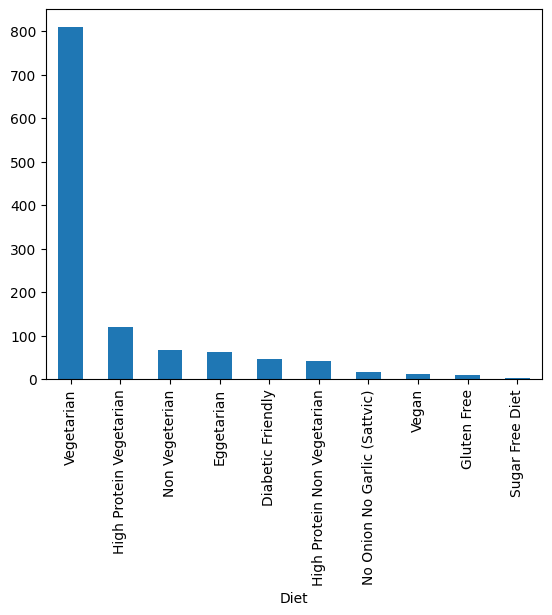

In [10]:
data['Diet'].value_counts().plot.bar()

<Axes: xlabel='count', ylabel='Diet'>

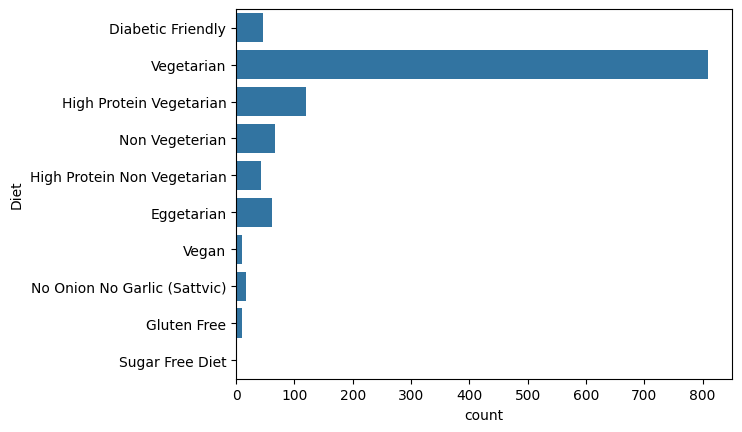

In [11]:
sns.countplot(data["Diet"])

In [12]:
#  drop rows with missing values
data = data.dropna()

In [13]:
data.head()

,RecipeName,TranslatedRecipeName,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,TranslatedInstructions,URL
0,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [14]:
data.isnull().sum()

,0
RecipeName,0
TranslatedRecipeName,0
TranslatedIngredients,0
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0


In [15]:

import re
def clean_text(text):
  # remove non-alphanumeric and extra whitespaces
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()      #strip removes white spaces
  return text

# apply text cleaning to relevant columns

text_columns = ["TranslatedRecipeName","TranslatedIngredients","TranslatedInstructions"]
for column in text_columns:
  data[column] = data[column].apply(clean_text)

In [16]:
# save the cleaned dataset
data.to_csv('cleaned_IndianFoodDataset.csv', index=False)

# Training GPT2 Model on cleaned IndianFoodDataset

In [17]:
from sklearn.model_selection import train_test_split
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

In [18]:
#  load the cleaned data

data= pd.read_csv("cleaned_IndianFoodDataset.csv")

In [19]:
# split the dataset into train, validation and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [20]:
# save the split datasets

train_data.to_csv("train_data.csv", index=False)
validation_data.to_csv("validation_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

In [21]:
#  load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [22]:
#  tokenize the datasets

train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="train_data.csv",
    block_size=128
)

validation_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="validation_data.csv",
    block_size=128
)

test_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="test_data.csv",
    block_size=128
)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [23]:
#  setup training arguments

training_args = TrainingArguments(
    output_dir="./gpt2_indian_fod",     # this folder will contain the weigts of this model training
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=10000,
    save_total_limit=2,
    prediction_loss_only=True,
)

In [24]:
#  setup trainer
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False
        ),
    train_dataset = train_dataset,
    eval_dataset = validation_dataset
)

In [25]:
#  start training
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ansarishakeel006 (ansarishakeel006-self) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
500,2.961800
1000,2.585100
1500,2.394800
2000,2.252700
2500,2.211300
3000,2.088900
3500,2.042200


TrainOutput(global_step=3912, training_loss=2.330256986715555, metrics={'train_runtime': 510.5423, 'train_samples_per_second': 15.319, 'train_steps_per_second': 7.662, 'total_flos': 510891245568000.0, 'train_loss': 2.330256986715555, 'epoch': 3.0})

In [26]:
# save the model
trainer.save_model("gpt-2indian-food")

# save the configuration file
model = trainer.model
model.config.save_pretrained("gpt-2indian-food_config.json")

In [27]:
# evaluate on the test set

results = trainer.evaluate(test_dataset)
print(results)

{'eval_loss': 2.2530252933502197, 'eval_runtime': 7.4462, 'eval_samples_per_second': 96.828, 'eval_steps_per_second': 12.221, 'epoch': 3.0}


# checking model evaluation with gradio interface

In [28]:
import gradio as gr
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [29]:
# load the gpt2 tokenizer and model

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt-2indian-food") # use the path where your model is saved

In [30]:
def generate_text(prompt):
  input_ids = tokenizer.encode(prompt, return_tensors="pt")
  output = model.generate(input_ids, max_length=50, num_beams=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)
  generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
  return generated_text

In [33]:
#  create a gradio interface

iface = gr.Interface(
    fn = generate_text,
    title = "GPT-2 Indian Food Recipe Generator",
    inputs = "text",
    outputs = "text",
    live = True,
    examples=[["To make a delicious curry, ", "you need to start with fresh vegetables and aromatic spices."]]
)

In [34]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5752df8c88ccd7ee4c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
